{'N': 1000, 'Nexp': 3, 'tau': 1000000, 't': 5000.0, 'W': 0.005, 'p': 0.005, 'v': 5.0, 'chi_sq': 5.807050314140533, 'pvalue': 0.7590634416285043}


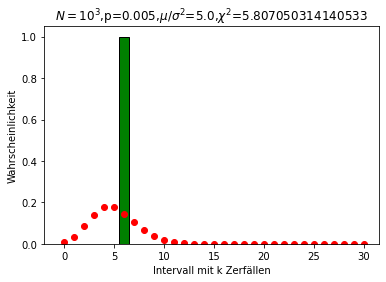

{'N': 10000, 'Nexp': 4, 'tau': 1000000, 't': 500.0, 'W': 0.005, 'p': 0.0005, 'v': 5.0, 'chi_sq': 1.12772255981426, 'pvalue': 0.999082318574742}


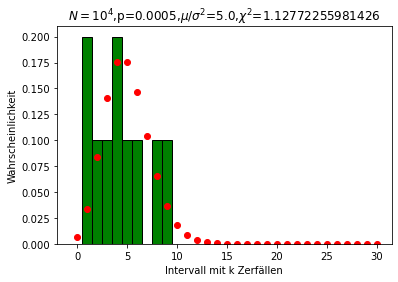

{'N': 100000, 'Nexp': 5, 'tau': 1000000, 't': 50.0, 'W': 0.005, 'p': 5e-05, 'v': 5.0, 'chi_sq': 0.11023332599052416, 'pvalue': 0.9999999996040925}


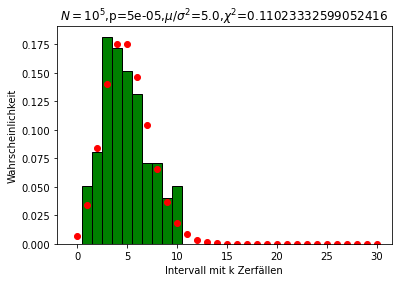

{'N': 1000000, 'Nexp': 6, 'tau': 1000000, 't': 5.0, 'W': 0.005, 'p': 5e-06, 'v': 5.0, 'chi_sq': 0.01939611268908663, 'pvalue': 1.0}


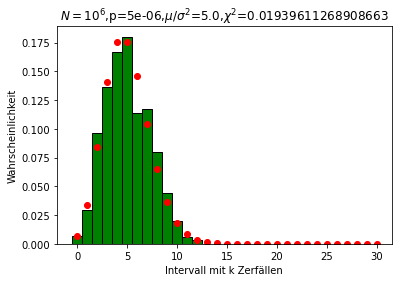

{'N': 10000000, 'Nexp': 7, 'tau': 1000000, 't': 0.5, 'W': 0.005, 'p': 5e-07, 'v': 5.0, 'chi_sq': 0.0010829042657445407, 'pvalue': 1.0}


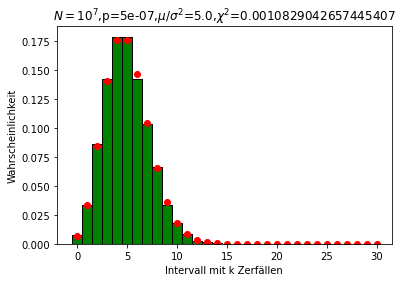

KeyboardInterrupt: 

In [3]:
%matplotlib inline
import numpy as np #berechenen der Ergebnisse 
import matplotlib.pyplot as plt #zeichnen der Ergebnisse
import time #messen der Runtime
import sys #darstellen des Fortschrittes
import math
import scipy
from scipy.stats import poisson
import matplotlib.pyplot as plt
import random



def gen_data(tau,T,N,Nint,seed=None,speichern=False,debug=False,lam=None): #Generiert den Datensatz
    if (seed == None):
        np.random.seed(seed)
    t = T/Nint #Länge der Unterintervalle
    W = T/tau 
    p = W/Nint 
    v = N*p #Erwartungswert/Varianz
    Nexp = int(math.log10(N)) #Exponent von N
    values={
        "N":N,
        "Nexp":Nexp,
        "tau":tau,
        "t":t,
        "W":W,
        "p":p,
        "v":v,
    }
    
    z = np.zeros(Nint,dtype=np.int_) #Array zum Auflisten der Ereignisse
                
    i=0
    for x in range(N): #Durchlaufen der Kerne
        
        '''if((x)==i):
            i+=int(N/100)
            sys.stdout.write(str(int(x/N*100))+"%")
            sys.stdout.write("\r")'''
        x=random.random()*tau #Erstellen einer zufallszahl zwischen 0 und tau
        if(x<T): #Wahrscheinlichkeit zerfall in T
            z[(int(x//t))]+=1 #Hinzufügen eines Ereignisses zur Liste

    if (debug):
        print(z)
        print(np.amax(z))
            
    if (speichern): #Speichern einer CSV datei mit den Ergebnissen
        filename=f"N_{N}_Nexp_{Nexp}_t_{t}_W_{W}_p_{p}_v_{v}"
        filename=filename.replace(".",",")
        lam=None
        if (lam==None):
            np.savetxt(f"{filename}.csv",z,delimiter=',')
        else:
            filename=str(str(lam)+"\\"+filename)           #HÄÄÄÄ
            print(filename)
            filename=str(filename)
            np.savetxt(f"{filename}.csv",z,delimiter=',')

    
        
    return z,values #Gibt Ergebisse und werte wieder

def draw_hist(array,values): #Zeichnet einen Datensatz
    
    v=values["v"]
    
    maxofz = np.amax(array) #Groesster Wert an Zerfaellen in einem Intervall
    maxofzv = np.amax([maxofz,v*2]) #Groesster Wert an Zerfaellen in einem Intervall oder varianz*2
    
    plt.ylabel('Wahrscheinlichkeit')
    plt.xlabel('Intervall mit k Zerfällen')
    
    #Idealle Possion Verteilung:
    
    x = np.arange(scipy.stats.poisson.ppf(10**(-15), v),scipy.stats.poisson.ppf(1-10**(-15), v))    
    y = poisson.pmf(x, v)
    plt.plot(x,y,"ob",color="red",) 
    
       
    bins3=np.arange(-0.5,maxofzv,1) #erstellen der Bins fürs Histogramm
    n_hist, bins_hist, patches_hist = plt.hist(array,edgecolor="black",density=True,color="green",bins=bins3)
    
    y=y[0:n_hist.size]#Anpassen der größe des Intervalles der idealen Possionverteilung zum berechen von Chi^2    
    chi_sq,pvalue=scipy.stats.chisquare(f_obs=n_hist,f_exp=y)
    values["chi_sq"]= chi_sq
    values["pvalue"]= pvalue
    
    print(values)
    plt.title(r"$N=10^{}$,p={},$\mu$/$\sigma^2$={},$\chi^2$={}"
              .format(values["Nexp"],values["p"],values["v"],values["chi_sq"]))
    
    plt.show()
    
def gen_hist(tau,T,N,Nint,seed=None,debug=False,speichern=False,lam=None): #generiert Daten und zeichnet sie
    
    array,values = gen_data(tau,T,N,Nint,seed=seed,debug=debug,speichern=speichern,lam=lam)
    draw_hist(array,values)
    
def gen_hist_lam(tau,T,Nend,lam,seed=None,debug=False,speichern=False): #lässt N bis 10^Nend laufen
    
    Nstart = int(math.log10(lam)) #Berechnet Startwert der Ns da dieser Größer Seien müssen als Lambda
    if(lam/10**Nstart!=1): #Überprüft ob Lambda eine Zehnerpotenz ist
        sys.stderr.write("Lambda muss eine Zehnerpotenz sein")
        sys.exit() #Stoppt die Ausführung um eine Division durch Null zu verhindern
    if(debug):
        print(f"Nstart:{Nstart}")
        
    for x in range(Nend-Nstart+1): #Erstellt Die Histogramme
        exp = Nstart+x
        N=int(10**exp)
        Nint=int(N/lam)
        gen_hist(tau,T,N,Nint,seed=seed,debug=debug,speichern=speichern,lam=lam)
                

start=time.time()

'''gen_hist(tau = 100000 #Lebenszeit
         ,T = 1000#Beobachtungsintervall
         ,N = 100000#Anzahl der Intervalle
         ,Nint = 500 #erintervalle
         ,debug=False #opt. Schaltet prints ein
         ,seed=None #opt. Setzt seed
         ,speichern=True)'''
gen_hist_lam(tau = 1000000 #Lebenszeit 
    ,T = 5000 #Beobachtungsintervall
    ,Nend = 9 #Ende der Ns #Schritte der Ns
    ,lam = 1000 #Festgehaltenes Lambda, Muss eine Zehnerpotenz sein
    ,debug=False #opt. Schaltet prints ein
    ,seed=None #opt. Setzt seed
    ,speichern=False)


end = time.time()
print(f"Runtime:{end-start}")